# Linear Regression with Python

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

### Check out the Data

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<AxesSubplot:>

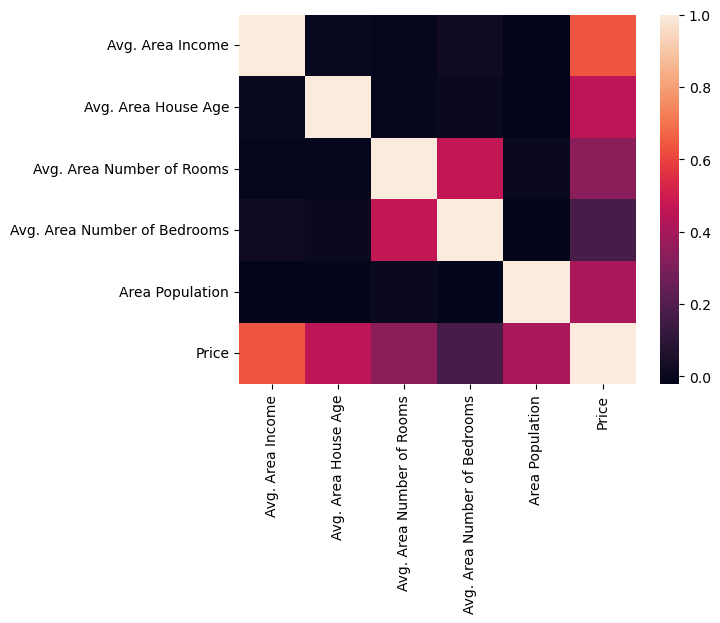

In [7]:
sns.heatmap(USAhousing.corr())

In [8]:
#Copy dataset

dataset =USAhousing.copy()
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [9]:
# Drop the original column State from the dataframe
dataset.drop(columns=['Address'],axis=1,inplace=True)
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [10]:
dependent_variable  = "Price"

In [11]:
#Create a list of independent variable
independent_variable = list(set(dataset.columns.tolist()) - {dependent_variable})

In [12]:
independent_variable

['Avg. Area Number of Bedrooms',
 'Avg. Area Number of Rooms',
 'Avg. Area House Age',
 'Area Population',
 'Avg. Area Income']

In [13]:
#Create the data of independent variables
X = dataset[independent_variable].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [15]:
dataset[independent_variable]

,Avg. Area Number of Bedrooms,Avg. Area Number of Rooms,Avg. Area House Age,Area Population,Avg. Area Income
0,4.09,7.009188,5.682861,23086.800503,79545.458574
1,3.09,6.730821,6.002900,40173.072174,79248.642455
2,5.13,8.512727,5.865890,36882.159400,61287.067179
3,3.26,5.586729,7.188236,34310.242831,63345.240046
4,4.23,7.839388,5.040555,26354.109472,59982.197226
...,...,...,...,...,...
4995,3.46,6.137356,7.830362,22837.361035,60567.944140
4996,4.02,6.576763,6.999135,25616.115489,78491.275435
4997,2.13,4.805081,7.250591,33266.145490,63390.686886
4998,5.44,7.130144,5.534388,42625.620156,68001.331235


In [16]:
#Splitting the dataset into the training set and test set
X_train , X_test, y_train , y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)

In [17]:
X_train[0:10]

array([[3.17000000e+00, 7.27519280e+00, 6.67569707e+00, 4.86948641e+04,
        8.01962423e+04],
       [3.24000000e+00, 8.26699440e+00, 6.91966289e+00, 4.99585810e+04,
        7.41306063e+04],
       [6.43000000e+00, 7.80991877e+00, 7.22428091e+00, 4.89180554e+04,
        6.73840004e+04],
       [4.24000000e+00, 7.32537954e+00, 6.27953689e+00, 3.12946525e+04,
        5.95695373e+04],
       [2.30000000e+00, 6.40611758e+00, 7.58855882e+00, 4.19303750e+04,
        5.83852154e+04],
       [3.17000000e+00, 6.28657948e+00, 5.41187741e+00, 3.63257876e+04,
        7.12772684e+04],
       [5.05000000e+00, 8.10641716e+00, 5.55731723e+00, 3.40666090e+04,
        8.22643727e+04],
       [2.27000000e+00, 5.45706093e+00, 5.55018407e+00, 2.78126859e+04,
        6.26391598e+04],
       [4.00000000e+00, 5.76868253e+00, 5.34993158e+00, 3.08844510e+04,
        5.56312978e+04],
       [2.15000000e+00, 6.45532652e+00, 6.56915800e+00, 4.62496257e+04,
        8.06941282e+04]])

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train[0:10]

array([[0.26      , 0.48829351, 0.58640285, 0.68166411, 0.61928532],
       [0.27555556, 0.63394613, 0.62188991, 0.70088757, 0.53532844],
       [0.98444444, 0.56682155, 0.66619938, 0.68505926, 0.44194597],
       [0.49777778, 0.49566377, 0.52877774, 0.41697487, 0.33378288],
       [0.06666667, 0.36066408, 0.71918692, 0.57876378, 0.3173902 ],
       [0.26      , 0.34310912, 0.40256876, 0.49350769, 0.49583425],
       [0.67777778, 0.6103643 , 0.42372431, 0.45914143, 0.64791114],
       [0.06      , 0.22128885, 0.42268673, 0.36400775, 0.37627074],
       [0.44444444, 0.26705254, 0.39355817, 0.41073495, 0.27927213],
       [0.03333333, 0.36789074, 0.57090577, 0.64446753, 0.62617676]])

In [20]:
#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [21]:
regressor.intercept_

-901139.4473633289

In [22]:
regressor.coef_

array([   9868.93010385,  819366.69584198, 1139905.51688736,
       1004867.59213703, 1564900.2504248 ])

In [23]:
y_pred_train = regressor.predict(X_train)

In [24]:
y_train

array([1616937.01868768, 1881075.43794209, 1930344.44890875, ...,
       1202992.88412315,  842985.85285497, 1571253.53147505])

In [25]:
#Predicting the test set result
y_pred = regressor.predict(X_test)

In [26]:
#Actual profits on the test data
y_test

array([ 894251.06863578,  932979.36062132,  920747.91128789,
        691854.921027  ,  732733.23629305,  945252.19180382,
        624482.76358665,  849566.08554459, 1544379.74773568,
       1535262.44079042,  568842.53557536, 1137523.11087169,
       2092949.86134061,  985749.78735653, 1265180.90891648,
        814240.28159835,  998773.99725848,  810537.14839216,
        978312.74841913, 1535946.64311382, 1057252.5826211 ,
       1031146.75455453, 1599634.46503679, 1086716.79570865,
       1168845.81517368, 1192677.55002104, 1064371.76412005,
       1377275.17877252, 1479295.57093729, 1182335.67965011,
       1545864.1664835 , 2105991.79156421,  809486.70992795,
       1464929.16219034, 1411054.31694068,  758262.61211065,
       1205114.23020705, 1684554.71545285, 1234629.59549004,
       1295945.61684099, 1735340.25568655,  943854.72789733,
       1103485.70726409, 1129408.87012587,  868314.47356254,
       1649947.15975202, 1131618.91336484, 1786085.750543  ,
       1214320.57436406,

In [27]:
mean_squared_error(y_test, y_pred)

10549721686.159071

In [28]:
#train performance
math.sqrt(mean_squared_error(y_test, y_pred))

102711.83810135553

In [29]:
r2_score(y_train, y_pred_train)

0.918840114090963

In [30]:
r2_score(y_test, y_pred)

0.9146454505138086